## DataGrasp Coding Test - Task 1 
### Zain Yousef

Import libraries

In [4]:
library(ISLR, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(dplyr, quietly = TRUE)
library(caret, quietly = TRUE)
library(MASS, quietly = TRUE)

Import Stock Market Data & Initial Analysis

In [19]:
Smarket = Smarket # import data
levels(Smarket$Direction) = c("Up", "Down") #relevel Direction

#dim(Smarket) # rows columns

#summary(Smarket) # summary of variables

#cor(Smarket) # Error in cor(Smarket) : 'x' must be numeric
#cor(Smarket[,-9]) #remove column 9 and display correlations

#pairs(Smarket) # scatterplot matrix

### 1) Split data into train & test
Split the dataset into training and testing parts. 
Generate training (before year 2005) and testing (on year 2005) datasets.

In [11]:
train = filter(Smarket, Year < 2005)
test = filter(Smarket, Year >= 2005)

### 2) Logistic Regression 

#### i) Fit a generalized linear regression to the training dataset using a logit link function, set distribution of the response variable to be binomial. Regress direction on Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume

In [23]:
mod = glm(Direction~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = train, family = binomial(link = "logit"))

predictions = predict(mod,newdata =  test, type = "response") # Predicts values using glm model

predictions = # Classifies predicted values as Up (>= 0.5) or Down (< 0.5)
  predictions %>% 
  as.data.frame() %>%
  mutate(predictions = ifelse(predictions >= 0.5, "Up","Down"))

test_w_predicted = cbind(test, "predictions" = predictions$predictions) #add predicted values to test dataset

test_w_predicted = # New column calculating whether prediction correct or incorrect
  test_w_predicted %>%
  mutate(`Correct Prediction` = ifelse(Direction == predictions, 1,0)) 
cat(paste(sum(test_w_predicted$`Correct Prediction`), "correct predictions out of", nrow(test_w_predicted) ))

levels(test_w_predicted$Direction) = c("Up", "Down") #relevel Direction variable
levels(test_w_predicted$predictions) = c("Up", "Down") #relevel Prediction variable

131 correct predictions out of 252

####  ii) Compute the confusion matrix of the outcome of testing data set

In [14]:
confusionMatrix(test_w_predicted$predictions, reference = test_w_predicted$Direction, "Up")

Confusion Matrix and Statistics

          Reference
Prediction Up Down
      Up   77   97
      Down 34   44
                                         
               Accuracy : 0.4802         
                 95% CI : (0.417, 0.5437)
    No Information Rate : 0.5595         
    P-Value [Acc > NIR] : 0.9952         
                                         
                  Kappa : 0.0054         
                                         
 Mcnemar's Test P-Value : 6.062e-08      
                                         
            Sensitivity : 0.6937         
            Specificity : 0.3121         
         Pos Pred Value : 0.4425         
         Neg Pred Value : 0.5641         
             Prevalence : 0.4405         
         Detection Rate : 0.3056         
   Detection Prevalence : 0.6905         
      Balanced Accuracy : 0.5029         
                                         
       'Positive' Class : Up             
                                         

### 3) Linear Discriminant Analysis

#### i) Perform LDA on the training data set using only two predictors, 1st lag and 2nd lag 


In [25]:
lda.mod = lda(Direction~ Lag1 + Lag2, data = train)

#### ii) Compute the confusion matrix of the outcome of testing data set

In [16]:
predict.lda = predict(lda.mod, newdata = test)
confusionMatrix(predict.lda$class, test$Direction, positive = "Up")

Confusion Matrix and Statistics

          Reference
Prediction  Up Down
      Up    35   35
      Down  76  106
                                          
               Accuracy : 0.5595          
                 95% CI : (0.4959, 0.6218)
    No Information Rate : 0.5595          
    P-Value [Acc > NIR] : 0.5262856       
                                          
                  Kappa : 0.0698          
                                          
 Mcnemar's Test P-Value : 0.0001467       
                                          
            Sensitivity : 0.3153          
            Specificity : 0.7518          
         Pos Pred Value : 0.5000          
         Neg Pred Value : 0.5824          
             Prevalence : 0.4405          
         Detection Rate : 0.1389          
   Detection Prevalence : 0.2778          
      Balanced Accuracy : 0.5335          
                                          
       'Positive' Class : Up              
                           

### 4) Comparison

#### i) Compare the two methods above and state the limitations and advantages of both methods 

- The overall accuracy of the LDA model (0.5595) is greater than the accuracy of the Logistic Regression model (0.4802) and therefore the LDA model is more accurate predictor for Sales (up/ down). 
- The LDA model has a higher accuracy rate for predicting both Up and Down outcomes. 
- LDA works under the assumption that the explanatory variables are normally distributed and therefore will perform better than a Logistic Regression model when the data is normally distributed. This advantage of LDA is also a limitation as it is only effective when the explanatory variables are normally distributed. 
- Below you can see that by plotting histograms for all of the explanatory variables they all suggest they follow a normal distrubution.

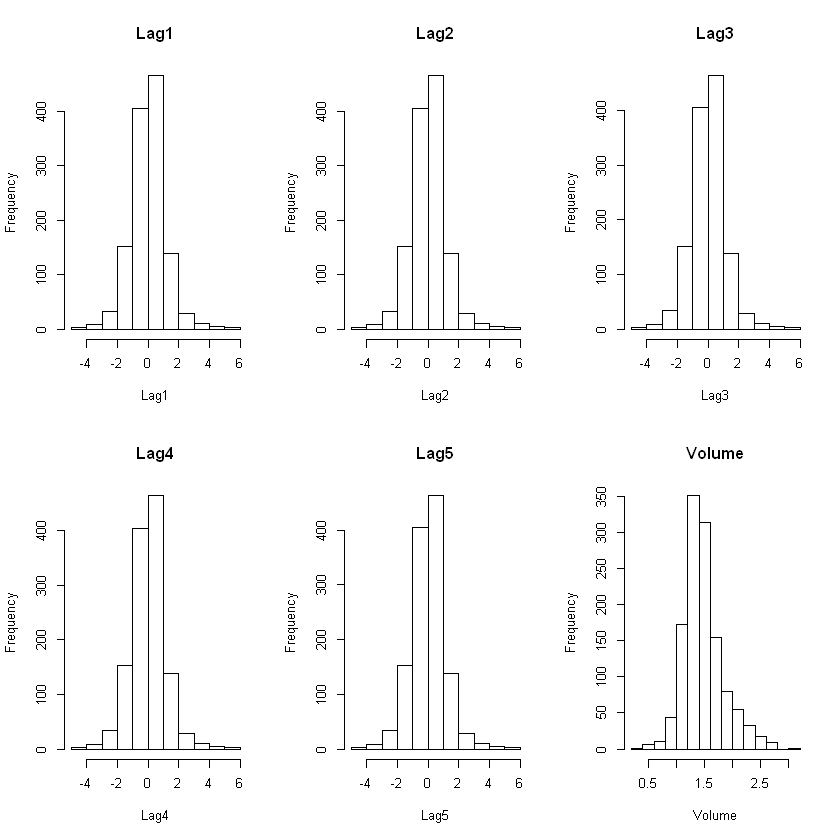

In [50]:
par(mfrow = c(2,3))
for(i in 2:7){hist(Smarket[,i], main = names(Smarket)[i], xlab = names(Smarket)[i])}

- Therefore explaining why the LDA model has a higher accuracy than the Logistic regression model in this scenario.
- Logistic regression models are not reliant on constant variance as well as normality of explanatory variables.